In [234]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Dataset Reference: https://www.kaggle.com/satwiktanwar/car-price-prediction

In [235]:
loan=pd.read_csv('train_u6lujuX_CVtuZ9i (1).csv')

In [236]:
#Data Exploration
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [237]:
loan.tail(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [238]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [239]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [240]:
loan.corr()['LoanAmount'].sort_values(ascending=False)

LoanAmount           1.000000
ApplicantIncome      0.570909
CoapplicantIncome    0.188619
Loan_Amount_Term     0.039447
Credit_History      -0.008433
Name: LoanAmount, dtype: float64

In [241]:
loan.drop(columns='Loan_ID',axis=1,inplace=True)

In [242]:
#Plots
#num_atr --> Numerical attributes
#cat_atr --> Categorical attributes
num_atr=['ApplicantIncome','CoapplicantIncome',	'LoanAmount','Loan_Amount_Term','Credit_History']

cat_atr=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']

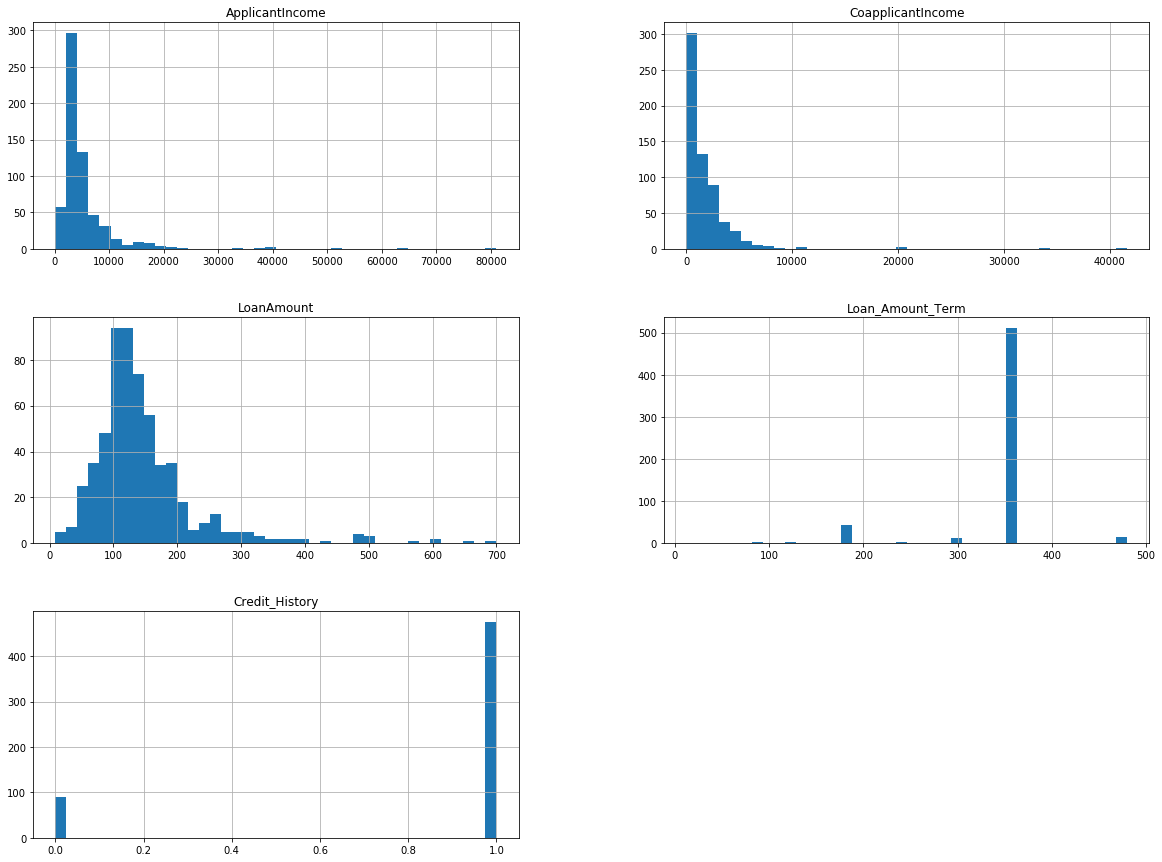

In [243]:
loan[num_atr].hist(bins=40, figsize=(20,15)) 
plt.show()

#We can observe that some of the numerical features are skewed towards left, specially the features which have positive strong correlation with price, so we will scale the data before training our model

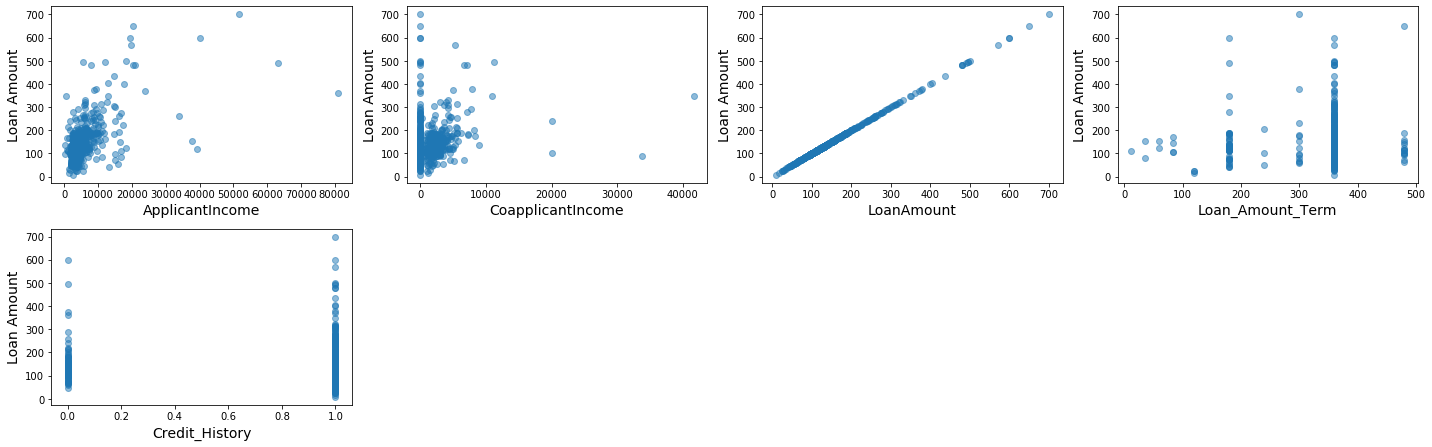

In [244]:
plt.figure(figsize=(20,12))
x=1
for i in num_atr:
    plt.subplot(4,4,x)
    plt.scatter(data=price,y='LoanAmount',x=i,alpha=0.5)
    plt.ylabel('Loan Amount',fontsize=14)
    plt.xlabel(i,fontsize=14)
    plt.tight_layout()
    x=x+1

In [254]:
num_atr.remove('LoanAmount')

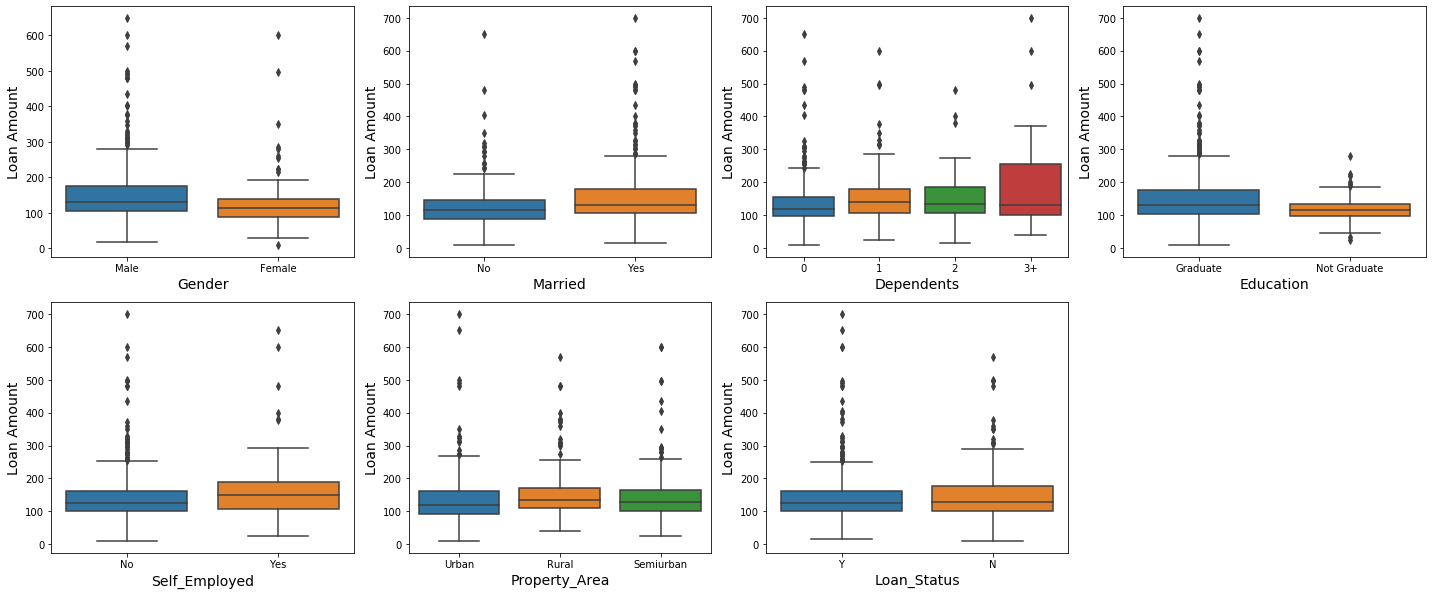

In [255]:
plt.figure(figsize=(20,12))
x=1
for i in cat_atr:
    plt.subplot(3,4,x)
    sns.boxplot(data=price,y='LoanAmount',x=i)
    plt.ylabel('Loan Amount',fontsize=14)
    plt.xlabel(i,fontsize=14)
    plt.tight_layout()
    x=x+1
plt.show()

In [256]:
#Finding out missing values in each column
loan.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [257]:
#FInding rows that have duplicate values
loan[loan.duplicated(keep = 'last')] 

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [258]:
loan = loan.dropna()

In [259]:
from sklearn.model_selection import train_test_split
X= loan.drop(['LoanAmount'],axis=1)
y= loan['LoanAmount']


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [260]:
atr=X_train.select_dtypes('number').columns

In [261]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score 
from sklearn.preprocessing import OneHotEncoder as onehot

In [262]:
ss = StandardScaler()
ss.fit_transform(X_train[num_atr])

array([[-0.28857143, -0.56357289,  0.25629636,  0.44241331],
       [-0.276885  , -0.66931869,  2.08854264,  0.44241331],
       [-0.49814814,  1.29091131,  0.25629636,  0.44241331],
       ...,
       [-0.32113763, -0.14058969,  0.25629636,  0.44241331],
       [-0.25553778,  0.49694388,  0.25629636,  0.44241331],
       [-0.3445105 ,  0.86006272,  0.25629636,  0.44241331]])

In [263]:
from sklearn.preprocessing import LabelEncoder

In [264]:
le = LabelEncoder()
X_train[cat_atr] = X_train[cat_atr].apply(le.fit_transform)

/srv/conda/envs/notebook/lib/python3.7/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [265]:
X_train[cat_atr].head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
560,1,1,2,1,0,1,1
75,1,0,0,0,0,2,0
145,0,1,0,0,0,1,1
397,1,1,0,0,0,2,1
319,1,1,1,0,1,0,0


In [266]:
a = X_train[cat_atr]
b = ss.transform(X_train[num_atr])

# 7.1 Horizontally concatenate now
Xtr = np.hstack([a,b]) # It is not X_train
Xtr.shape # (11,15)

(336, 11)

In [267]:
Xtr

array([[ 1.        ,  1.        ,  2.        , ..., -0.56357289,
         0.25629636,  0.44241331],
       [ 1.        ,  0.        ,  0.        , ..., -0.66931869,
         2.08854264,  0.44241331],
       [ 0.        ,  1.        ,  0.        , ...,  1.29091131,
         0.25629636,  0.44241331],
       ...,
       [ 1.        ,  1.        ,  1.        , ..., -0.14058969,
         0.25629636,  0.44241331],
       [ 1.        ,  1.        ,  0.        , ...,  0.49694388,
         0.25629636,  0.44241331],
       [ 1.        ,  1.        ,  2.        , ...,  0.86006272,
         0.25629636,  0.44241331]])

In [268]:
from sklearn.neighbors import KNeighborsRegressor

In [269]:
# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)
# fit the model using the training data and training targets
reg.fit(Xtr, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [270]:
ss = StandardScaler()
ss.fit_transform(X_test[num_atr])
le = LabelEncoder()
X_test[cat_atr] = X_test[cat_atr].apply(le.fit_transform)
a1 = X_test[cat_atr]
b1 = ss.transform(X_test[num_atr])

# 7.1 Horizontally concatenate now
Xtr1 = np.hstack([a1,b1]) # It is not X_train
Xtr1.shape # (11,15)

/srv/conda/envs/notebook/lib/python3.7/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


(144, 11)

In [271]:
reg.predict(Xtr1)

array([137.33333333, 124.66666667, 167.33333333, 115.33333333,
       144.        , 118.66666667, 124.        , 139.33333333,
       118.66666667,  78.        , 144.        , 103.66666667,
       180.33333333, 119.33333333,  47.66666667, 113.66666667,
       107.33333333, 107.33333333, 228.33333333, 436.66666667,
       128.        ,  89.        , 142.33333333, 123.        ,
       157.        , 127.        ,  95.66666667, 127.66666667,
       176.33333333, 176.66666667, 105.        , 135.33333333,
       229.        , 104.        , 180.66666667, 186.66666667,
       248.33333333, 132.        , 252.        , 158.33333333,
       126.66666667, 187.66666667, 130.        , 446.66666667,
       109.66666667, 158.33333333,  79.66666667, 160.        ,
       121.        , 136.33333333, 136.33333333,  78.        ,
       117.        , 275.        , 144.        , 107.        ,
       104.        , 111.        , 211.66666667, 296.        ,
       105.66666667, 275.        ,  84.33333333, 219.  

In [272]:
from sklearn.model_selection import cross_val_score

In [273]:
def initial_check(model,X_train,y_train):
    rmse_score=cross_val_score(model,X_train,y_train,scoring='neg_mean_squared_error',cv=10)
    r2_score=cross_val_score(model,X_train,y_train,scoring='r2',cv=10)
    print("RMSE (cross_val_score): ",np.sqrt(-rmse_score).mean())
    print("R2 Score (cross_val_score): ",r2_score.mean())
    

In [274]:
initial_check(reg,Xtr,y_train)

RMSE (cross_val_score):  69.54274710447775
R2 Score (cross_val_score):  -0.0029524936199443186


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_split.py:442: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_split.py:102: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Depreca

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_split.py:442: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_split.py:102: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Depreca

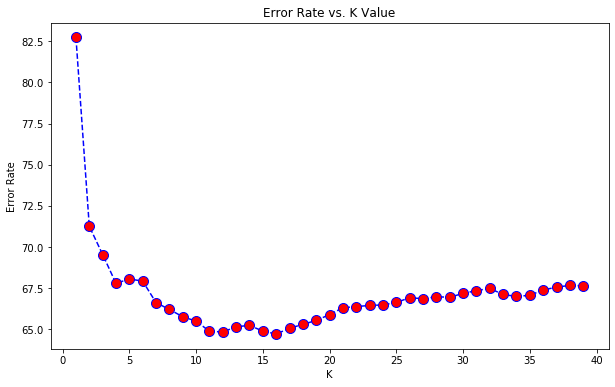

Minimum error:- 64.71495228091551 at K = 16


In [275]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsRegressor(n_neighbors=i)
 knn.fit(Xtr,y_train)
 rmse_score=cross_val_score(knn,Xtr,y_train,scoring='neg_mean_squared_error',cv=10)
 #pred_i = knn.predict(X_test)
 #print (pred_i)
 #print (1-accuracy_score(y_test, pred_i))
 error_rate.append(np.sqrt(-rmse_score).mean())

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)